# Import

In [4]:
import ROOT
%matplotlib inline
from ROOT import gROOT, TCanvas
#!pip install matplotlib
from ROOT import TCanvas, TF2, TH2D, TLegend

# List the files

In [5]:
import os

# Specify the directory path
directory = '/pnfs/sbnd/persistent/users/hlay/crt_comm_summer_2024/'

# List files in the directory
files = os.listdir(directory)

# Print the file names
for file in files:
    print(file)


run13178_crtana.root
run13466_crtana.root
run13476_crtana.root
run13666_crtana.root
run13680_crtana.root
run13758_crtana.root
run13690_crtana.root
run13688_crtana_flat.root
run13828_crtana.root
run13830_crtana_channel_map_v5.root
run13268_crtana.root
run13830_crtana.root
run13688_13689_13690_13693_13758_crtana_flat_etrig.root
run13689_crtana.root
run13470_crtana.root
run13688_crtana.root
run13466_fixed_channel_map_crtana.root
run13281_crtana.root
run13268_crtana_all.root
run13828_crtana_channel_map_v5.root
run13470_run13666_crtana.root
run13320_crtana.root
run13693_crtana.root
run13688_13689_13690_13693_13758_crtana_flat.root


# Create chain of multiple data sets

In [6]:
import ROOT

# List of filenames with full paths
filenames = [
    "/pnfs/sbnd/persistent/users/hlay/crt_comm_summer_2024/run13178_crtana.root",
    "/pnfs/sbnd/persistent/users/hlay/crt_comm_summer_2024/run13466_crtana.root",
    #"/pnfs/sbnd/persistent/users/hlay/crt_comm_summer_2024/run13476_crtana.root",
    "/pnfs/sbnd/persistent/users/hlay/crt_comm_summer_2024/run13666_crtana.root",
    #"/pnfs/sbnd/persistent/users/hlay/crt_comm_summer_2024/run13680_crtana.root",
    #"/pnfs/sbnd/persistent/users/hlay/crt_comm_summer_2024/run13758_crtana.root",
    "/pnfs/sbnd/persistent/users/hlay/crt_comm_summer_2024/run13690_crtana.root",
    #"/pnfs/sbnd/persistent/users/hlay/crt_comm_summer_2024/run13688_crtana_flat.root",
    #"/pnfs/sbnd/persistent/users/hlay/crt_comm_summer_2024/run13828_crtana.root",
    #"/pnfs/sbnd/persistent/users/hlay/crt_comm_summer_2024/run13268_crtana.root",
    #"/pnfs/sbnd/persistent/users/hlay/crt_comm_summer_2024/run13830_crtana.root",
    #"/pnfs/sbnd/persistent/users/hlay/crt_comm_summer_2024/run13688_13689_13690_13693_13758_crtana_flat_etrig.root",
    #"/pnfs/sbnd/persistent/users/hlay/crt_comm_summer_2024/run13689_crtana.root",
    #"/pnfs/sbnd/persistent/users/hlay/crt_comm_summer_2024/run13470_crtana.root",
    "/pnfs/sbnd/persistent/users/hlay/crt_comm_summer_2024/run13688_crtana.root",
    #"/pnfs/sbnd/persistent/users/hlay/crt_comm_summer_2024/run13466_fixed_channel_map_crtana.root",
    #"/pnfs/sbnd/persistent/users/hlay/crt_comm_summer_2024/run13281_crtana.root",
    #"/pnfs/sbnd/persistent/users/hlay/crt_comm_summer_2024/run13268_crtana_all.root",
    #"/pnfs/sbnd/persistent/users/hlay/crt_comm_summer_2024/run13470_run13666_crtana.root",
    #"/pnfs/sbnd/persistent/users/hlay/crt_comm_summer_2024/run13320_crtana.root",
    #"/pnfs/sbnd/persistent/users/hlay/crt_comm_summer_2024/run13693_crtana.root",
    #"/pnfs/sbnd/persistent/users/hlay/crt_comm_summer_2024/run13688_13689_13690_13693_13758_crtana_flat.root"
]
# Create a TChain and add all the files to it
# Update this line based on the correct tree path found from the previous cell
chain = ROOT.TChain("crtana/tree")  # Assuming "crtana/tree" is the path to the TTree in each file

for filename in filenames:
    chain.Add(filename)

# Check if the TChain has entries
n_entries = chain.GetEntries()
print(f"Number of entries in the TChain: {n_entries}")

if n_entries == 0:
    print("No entries found in the TChain. Please check the filenames and tree names.")


Number of entries in the TChain: 98388


# Plot of t1

Info in <TCanvas::Print>: png file cl_sp_ts1_plot.png has been created


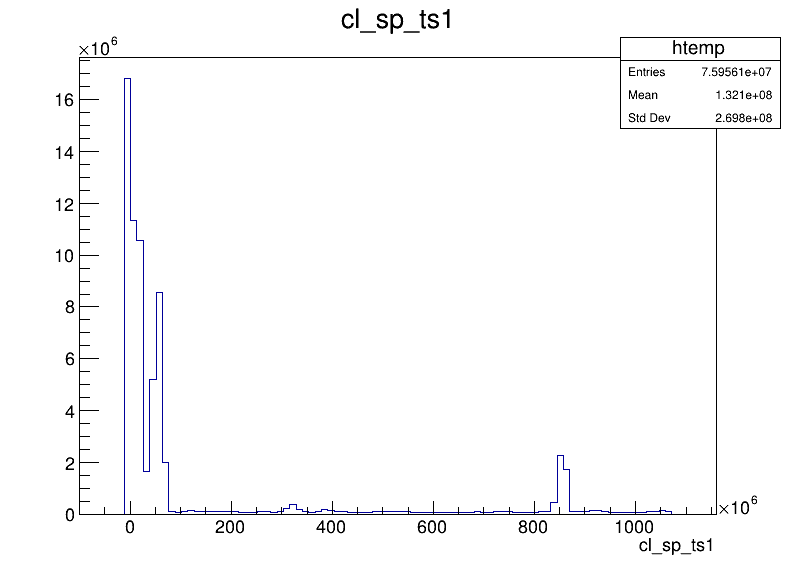

In [7]:
# Create a canvas for plotting
canvas1 = ROOT.TCanvas("canvas1", "Interactive Cut", 800, 600)

# Check if the variable 'cl_sp_ts1' exists
branch_exists = chain.GetListOfBranches().FindObject("cl_sp_ts1")
if not branch_exists:
    print("Branch 'cl_sp_ts1' not found in the TChain. Please check the variable name.")
else:
    # Draw the cl_sp_ts1 variable from all trees in the chain
    chain.Draw("cl_sp_ts1")

    # Update the canvas to display the plot
    canvas1.Draw()

    # Optionally, save the plot
    canvas1.SaveAs("cl_sp_ts1_plot.png")



# Load data and filter it into histograms

## All sides no time cut

In [9]:
%jsroot on

# Create histograms
histogram1_f = ROOT.TH1D("histogram1Df_x", "Front face (x)", 50, -400, 400)
histogram2_f = ROOT.TH1D("histogram1Df_y", "Front face (y)", 50, -400, 400)
histogram3_f = ROOT.TH2D("histogram2Df", "Front face", 50, -400, 400, 50, -400, 400)
histogram1_b = ROOT.TH1D("histogram1Db_x", "Back face (x)", 50, -400, 400)
histogram2_b = ROOT.TH1D("histogram1Db_y", "Back face (y)", 50, -400, 400)
histogram3_b = ROOT.TH2D("histogram2Db", "Back face", 50, -400, 400, 50, -400, 400)
histogram1_l = ROOT.TH1D("histogram1Dl_y", "Left face (y)", 50, -400, 400)
histogram2_l = ROOT.TH1D("histogram1Dl_z", "Left face (z)", 50, -200, 800)
histogram3_l = ROOT.TH2D("histogram2Dl", "Left face", 50, -400, 400, 50, -200, 800)
histogram1_r = ROOT.TH1D("histogram1Dr_y", "Right face (y)", 50, -400, 400)
histogram2_r = ROOT.TH1D("histogram1Dr_z", "Right face (z)", 50, -200, 800)
histogram3_r = ROOT.TH2D("histogram2Dr", "Right face", 50, -400, 400, 50, -200, 800)
histogram1_t = ROOT.TH1D("histogram1Dt_x", "Top face (x)", 50, -400, 400)
histogram2_t = ROOT.TH1D("histogram1Dt_z", "Top face (z)", 50, -200, 800)
histogram3_t = ROOT.TH2D("histogram2Dt", "Top face", 10, -400, 400, 50, -200, 800)
histogram1_d = ROOT.TH1D("histogram1Dd_x", "Bottom face (x)", 50, -400, 400)
histogram2_d = ROOT.TH1D("histogram1Dd_z", "Bottom face (z)", 50, -200, 800)
histogram3_d = ROOT.TH2D("histogram2Dd", "Bottom face", 50, -400, 400, 50, -200, 800)

n = chain.GetEntries()

# Fill histograms
for i in range(n):
    chain.GetEntry(i)
    if (i % 1000) == 0:
        print(i, "k")   
    if not chain.cl_has_sp:
        continue
    if chain.cl_has_sp:
        for j in range(len(chain.cl_sp_x)):
            t1 = chain.cl_sp_ts1[j]
            x = chain.cl_sp_x[j]
            y = chain.cl_sp_y[j]
            z = chain.cl_sp_z[j]
            if (-450 < y < -350):
                histogram1_d.Fill(x)
                histogram2_d.Fill(z)
                histogram3_d.Fill(x, z)
            elif (350 < y < 450):
                histogram1_t.Fill(x)
                histogram2_t.Fill(z)
                histogram3_t.Fill(x, z)
            elif (-450 < x < -350):
                histogram1_r.Fill(y)
                histogram2_r.Fill(z)
                histogram3_r.Fill(y, z)
            elif (350 < x < 450): 
                histogram1_l.Fill(y)
                histogram2_l.Fill(z)
                histogram3_l.Fill(y, z)
            #if (y > -350): #extra if statement to cut off feet
            elif (750 < z < 850):
                histogram1_b.Fill(x)
                histogram2_b.Fill(y)
                histogram3_b.Fill(x, y)
            elif (-250 < z < -150):
                histogram1_f.Fill(x)
                histogram2_f.Fill(y)
                histogram3_f.Fill(x, y)


0 k
1000 k
2000 k
3000 k
4000 k
5000 k
6000 k
7000 k
8000 k
9000 k
10000 k
11000 k
12000 k
13000 k
14000 k
15000 k
16000 k
17000 k
18000 k
19000 k
20000 k
21000 k
22000 k
23000 k
24000 k
25000 k
26000 k
27000 k
28000 k
29000 k
30000 k
31000 k
32000 k
33000 k
34000 k
35000 k
36000 k
37000 k
38000 k
39000 k
40000 k
41000 k
42000 k
43000 k
44000 k
45000 k
46000 k
47000 k
48000 k
49000 k
50000 k
51000 k
52000 k
53000 k
54000 k
55000 k
56000 k
57000 k
58000 k
59000 k
60000 k
61000 k
62000 k
63000 k
64000 k
65000 k
66000 k
67000 k
68000 k
69000 k
70000 k
71000 k
72000 k
73000 k
74000 k
75000 k
76000 k
77000 k
78000 k
79000 k
80000 k
81000 k
82000 k
83000 k
84000 k
85000 k
86000 k
87000 k
88000 k
89000 k
90000 k
91000 k
92000 k
93000 k
94000 k
95000 k
96000 k
97000 k
98000 k


## Front and back with time cut

In [14]:
%jsroot on

# Create histograms
histogram1_f_t = ROOT.TH1D("histogram1D_x", "Front face (x)", 10, -400, 400)
histogram2_f_t = ROOT.TH1D("histogram1D_y", "Front face (y)", 10, -400, 400)
histogram3_f_t = ROOT.TH2D("histogram2D", "Front face", 10, -400, 400, 10, -400, 400)
histogram1_b_t = ROOT.TH1D("histogram1D_x", "Back face (x)", 10, -400, 400)
histogram2_b_t = ROOT.TH1D("histogram1D_y", "Back face (y)", 10, -400, 400)
histogram3_b_t = ROOT.TH2D("histogram2D", "Back face", 10, -400, 400, 10, -400, 400)
histogram_t_t = ROOT.TH1D("histogram2D", "Time", 300, 1520e3, 1540e3)

n = chain.GetEntries()

# Fill histograms
for i in range(n):
    chain.GetEntry(i)
    if (i % 1000) == 0:
        print(i, "k")   
    if not chain.cl_has_sp:
        continue
    if chain.cl_has_sp:
        for j in range(len(chain.cl_sp_x)):
            t1 = chain.cl_sp_ts1[j]
            x = chain.cl_sp_x[j]
            y = chain.cl_sp_y[j]
            z = chain.cl_sp_z[j]
            histogram_t_t.Fill(t1)
            if (1529.8e3 < t1 < 1532.8e3): #the time cut
                if (y > -350):
                    if (750 < z < 850):
                        histogram1_b_t.Fill(x)
                        histogram2_b_t.Fill(y)
                        histogram3_b_t.Fill(x, y)
                    if (-250 < z < -150):
                        histogram1_f_t.Fill(x)
                        histogram2_f_t.Fill(y)
                        histogram3_f_t.Fill(x, y)


0 k
1000 k
2000 k
3000 k
4000 k
5000 k
6000 k
7000 k
8000 k
9000 k
10000 k
11000 k
12000 k
13000 k
14000 k
15000 k
16000 k
17000 k
18000 k
19000 k
20000 k
21000 k
22000 k
23000 k
24000 k
25000 k
26000 k
27000 k
28000 k
29000 k
30000 k
31000 k
32000 k
33000 k
34000 k
35000 k
36000 k
37000 k
38000 k
39000 k
40000 k
41000 k
42000 k
43000 k
44000 k
45000 k
46000 k
47000 k
48000 k
49000 k
50000 k
51000 k
52000 k
53000 k
54000 k
55000 k
56000 k
57000 k
58000 k
59000 k
60000 k
61000 k
62000 k
63000 k
64000 k
65000 k
66000 k
67000 k
68000 k
69000 k
70000 k
71000 k
72000 k
73000 k
74000 k
75000 k
76000 k
77000 k
78000 k
79000 k
80000 k
81000 k
82000 k
83000 k
84000 k
85000 k
86000 k
87000 k
88000 k
89000 k
90000 k
91000 k
92000 k
93000 k
94000 k
95000 k
96000 k
97000 k
98000 k


Warning in <TROOT::Append>: Replacing existing TH1: histogram1D_x (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: histogram1D_y (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: histogram2D (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: histogram2D (Potential memory leak).


# Zoom in on t1 to see beam spill and decide where to cut

In [10]:
%jsroot on

histogram_t_t.GetXaxis().SetTitle("Time (ns)")
histogram_t_t.GetYaxis().SetTitle("Number of hits")

c_t_t = ROOT.TCanvas("c_t_t", "t1", 350, 300)
c_t_t.SetWindowPosition(0, 0)
histogram_t_t.Draw()
c_t_t.Draw()
c_t_t.SaveAs("t1.png")

NameError: name 'histogram_t_t' is not defined

# Plots with no time cut

## Set axes

In [11]:
%jsroot on

histogram1_f.GetXaxis().SetTitle("x (cm)")
histogram1_f.GetYaxis().SetTitle("Number of hits")
histogram2_f.GetXaxis().SetTitle("y (cm)")
histogram2_f.GetYaxis().SetTitle("Number of hits")
histogram3_f.GetXaxis().SetTitle("x (cm)")
histogram3_f.GetYaxis().SetTitle("y (cm)")

histogram1_b.GetXaxis().SetTitle("x (cm)")
histogram1_b.GetYaxis().SetTitle("Number of hits")
histogram2_b.GetXaxis().SetTitle("y (cm)")
histogram2_b.GetYaxis().SetTitle("Number of hits")
histogram3_b.GetXaxis().SetTitle("x (cm)")
histogram3_b.GetYaxis().SetTitle("y (cm)")

histogram1_l.GetXaxis().SetTitle("y (cm)")
histogram1_l.GetYaxis().SetTitle("Number of hits")
histogram2_l.GetXaxis().SetTitle("z (cm)")
histogram2_l.GetYaxis().SetTitle("Number of hits")
histogram3_l.GetXaxis().SetTitle("y (cm)")
histogram3_l.GetYaxis().SetTitle("z (cm)")

histogram1_r.GetXaxis().SetTitle("y (cm)")
histogram1_r.GetYaxis().SetTitle("Number of hits")
histogram2_r.GetXaxis().SetTitle("z (cm)")
histogram2_r.GetYaxis().SetTitle("y (cm)")
histogram3_r.GetXaxis().SetTitle("Number of hits")
histogram3_r.GetYaxis().SetTitle("z (cm)")

histogram1_t.GetXaxis().SetTitle("x (cm)")
histogram1_t.GetYaxis().SetTitle("Number of hits")
histogram2_t.GetXaxis().SetTitle("z (cm)")
histogram2_t.GetYaxis().SetTitle("Number of hits")
histogram3_t.GetXaxis().SetTitle("x (cm)")
histogram3_t.GetYaxis().SetTitle("z (cm)")

histogram1_d.GetXaxis().SetTitle("x (cm)")
histogram1_d.GetYaxis().SetTitle("Number of hits")
histogram2_d.GetXaxis().SetTitle("z (cm)")
histogram2_d.GetYaxis().SetTitle("Number of hits")
histogram3_d.GetXaxis().SetTitle("x (cm)")
histogram3_d.GetYaxis().SetTitle("z (cm)")

## Plot data with no time cut

In [12]:
# Create canvases
c1_f = ROOT.TCanvas("c1_f", "Front Face (x)", 350, 300)
c2_f = ROOT.TCanvas("c2_f", "Front Face (y)", 350, 300)
c3_f = ROOT.TCanvas("c3_f", "Front Face", 350, 300)
c1_b = ROOT.TCanvas("c1_b", "Back Face (x)", 350, 300)
c2_b = ROOT.TCanvas("c2_b", "Back Face (y)", 350, 300)
c3_b = ROOT.TCanvas("c3_b", "Back Face", 350, 300)
c1_l = ROOT.TCanvas("c1_l", "Left Face (y)", 350, 300)
c2_l = ROOT.TCanvas("c2_l", "Left Face (z)", 350, 300)
c3_l = ROOT.TCanvas("c3_l", "Left Face", 350, 300)
c1_r = ROOT.TCanvas("c1_r", "Right Face (y)", 350, 300)
c2_r = ROOT.TCanvas("c2_r", "Right Face (z)", 350, 300)
c3_r = ROOT.TCanvas("c3_r", "Right Face", 350, 300)
c1_t = ROOT.TCanvas("c1_t", "Top Face (x)", 350, 300)
c2_t = ROOT.TCanvas("c2_t", "Top Face (z)", 350, 300)
c3_t = ROOT.TCanvas("c3_t", "Top Face", 350, 300)
c1_d = ROOT.TCanvas("c1_d", "Bottom Face (x)", 350, 300)
c2_d = ROOT.TCanvas("c2_d", "Bottom Face (z)", 350, 300)
c3_d = ROOT.TCanvas("c3_d", "Bottom Face", 350, 300)

# Set window position
c1_f.SetWindowPosition(0, 0)
c2_f.SetWindowPosition(350, 0)
c3_f.SetWindowPosition(700, 0)
c1_b.SetWindowPosition(1050, 0)
c2_b.SetWindowPosition(1400, 0)
c3_b.SetWindowPosition(1750, 0)
c1_l.SetWindowPosition(2100, 0)
c2_l.SetWindowPosition(2450, 0)
c3_l.SetWindowPosition(2800, 0)
c1_r.SetWindowPosition(3150, 0)
c2_r.SetWindowPosition(3500, 0)
c3_r.SetWindowPosition(3850, 0)
c1_t.SetWindowPosition(4200, 0)
c2_t.SetWindowPosition(4550, 0)
c3_t.SetWindowPosition(4900, 0)
c1_d.SetWindowPosition(5250, 0)
c2_d.SetWindowPosition(5600, 0)
c3_d.SetWindowPosition(5950, 0)

# Draw histograms
c1_f.cd()
histogram1_f.Draw()

c2_f.cd()
histogram2_f.Draw()

c3_f.cd()
histogram3_f.Draw("COLZ")
c3_f.SetLogz()

c1_b.cd()
histogram1_b.Draw()

c2_b.cd()
histogram2_b.Draw()

c3_b.cd()
histogram3_b.Draw("COLZ")
c3_b.SetLogz()

c1_l.cd()
histogram1_l.Draw()

c2_l.cd()
histogram2_l.Draw()

c3_l.cd()
histogram3_l.Draw("COLZ")
c3_l.SetLogz()

c1_r.cd()
histogram1_r.Draw()

c2_r.cd()
histogram2_r.Draw()

c3_r.cd()
histogram3_r.Draw("COLZ")
c3_r.SetLogz()

c1_t.cd()
histogram1_t.Draw()

c2_t.cd()
histogram2_t.Draw()

c3_t.cd()
histogram3_t.Draw("COLZ")
c3_t.SetLogz()

c1_d.cd()
histogram1_d.Draw()

c2_d.cd()
histogram2_d.Draw()

c3_d.cd()
histogram3_d.Draw("COLZ")
c3_d.SetLogz()


c1_f.Draw()
c2_f.Draw()
c3_f.Draw()
c1_b.Draw()
c2_b.Draw()
c3_b.Draw()

c1_l.Draw()
c2_l.Draw()
c3_l.Draw()
c1_r.Draw()
c2_r.Draw()
c3_r.Draw()

c1_t.Draw()
c2_t.Draw()
c3_t.Draw()
c1_d.Draw()
c2_d.Draw() 
c3_d.Draw()

# Save plots
c1_f.SaveAs("Front_face_x.png")
c2_f.SaveAs("Front_face_y.png")
c3_f.SaveAs("Front_face.png")
c1_b.SaveAs("Back_face_x.png")
c2_b.SaveAs("Back_face_y.png")
c3_b.SaveAs("Back_face.png")
c1_l.SaveAs("Left_face_y.png")
c2_l.SaveAs("Left_face_z.png")
c3_l.SaveAs("Left_face.png")
c1_r.SaveAs("Right_face_y.png")
c2_r.SaveAs("Right_face_z.png")
c3_r.SaveAs("Right_face.png")
c1_t.SaveAs("Top_face_x.png")
c2_t.SaveAs("Top_face_y.png")
c3_t.SaveAs("Top_face.png")
c1_d.SaveAs("Bottom_face_x.png")
c2_d.SaveAs("Bottom_face_y.png")
c3_d.SaveAs("Bottom_face.png")

Info in <TCanvas::Print>: png file Front_face_x.png has been created
Info in <TCanvas::Print>: png file Front_face_y.png has been created
Info in <TCanvas::Print>: png file Front_face.png has been created
Info in <TCanvas::Print>: png file Back_face_x.png has been created
Info in <TCanvas::Print>: png file Back_face_y.png has been created
Info in <TCanvas::Print>: png file Back_face.png has been created
Info in <TCanvas::Print>: png file Left_face_y.png has been created
Info in <TCanvas::Print>: png file Left_face_z.png has been created
Info in <TCanvas::Print>: png file Left_face.png has been created
Info in <TCanvas::Print>: png file Right_face_y.png has been created
Info in <TCanvas::Print>: png file Right_face_z.png has been created
Info in <TCanvas::Print>: png file Right_face.png has been created
Info in <TCanvas::Print>: png file Top_face_x.png has been created
Info in <TCanvas::Print>: png file Top_face_y.png has been created
Info in <TCanvas::Print>: png file Top_face.png has 

# Plots with time cut

In [13]:
%jsroot on

#Set axes
histogram1_f_t.GetXaxis().SetTitle("x (cm)")
histogram1_f_t.GetYaxis().SetTitle("Number of hits")
histogram2_f_t.GetXaxis().SetTitle("y (cm)")
histogram2_f_t.GetYaxis().SetTitle("Number of hits")
histogram3_f_t.GetXaxis().SetTitle("x (cm)")
histogram3_f_t.GetYaxis().SetTitle("y (cm)")

histogram1_b_t.GetXaxis().SetTitle("x (cm)")
histogram1_b_t.GetYaxis().SetTitle("Number of hits")
histogram2_b_t.GetXaxis().SetTitle("y (cm)")
histogram2_b_t.GetYaxis().SetTitle("Number of hits")
histogram3_b_t.GetXaxis().SetTitle("x (cm)")
histogram3_b_t.GetYaxis().SetTitle("y (cm)")

#Create canvase
c1_f_t = ROOT.TCanvas("c1_f_t", "Front Face (x)", 350, 300)
c2_f_t = ROOT.TCanvas("c2_f_t", "Front Face (y)", 350, 300)
c3_f_t = ROOT.TCanvas("c3_f_t", "Front Face", 350, 300)
c1_b_t = ROOT.TCanvas("c1_b_t", "Back Face (x)", 350, 300)
c2_b_t = ROOT.TCanvas("c2_b_t", "Back Face (y)", 350, 300)
c3_b_t = ROOT.TCanvas("c3_b_t", "Back Face", 350, 300)

#Set window position
c1_f_t.SetWindowPosition(0, 0)
c2_f_t.SetWindowPosition(350, 0)
c3_f_t.SetWindowPosition(700, 0)
c1_b_t.SetWindowPosition(1050, 0)
c2_b_t.SetWindowPosition(1400, 0)
c3_b_t.SetWindowPosition(1750, 0)

#Draw histograms
c1_f_t.cd()
histogram1_f_t.Draw()
c2_f_t.cd()
histogram2_f_t.Draw()
c3_f_t.cd()
histogram3_f_t.Draw("COLZ")
c3_f_t.SetLogz()

c1_b_t.cd()
histogram1_b_t.Draw()
c2_b_t.cd()
histogram2_b_t.Draw()
c3_b_t.cd()
histogram3_b_t.Draw("COLZ")
c3_b_t.SetLogz()

c1_f_t.Draw()
c2_f_t.Draw()
c3_f_t.Draw()
c1_b_t.Draw()
c2_b_t.Draw()
c3_b_t.Draw()

c1_f.SaveAs("Front_face_x_timecut.png")
c2_f.SaveAs("Front_face_y_timecut.png")
c3_f.SaveAs("Front_face_timecut.png")
c1_b.SaveAs("Back_face_x_timecut.png")
c2_b.SaveAs("Back_face_y_timecut.png")
c3_b.SaveAs("Back_face_timecut.png")

NameError: name 'histogram1_f_t' is not defined